# Implement the pocket algorithm
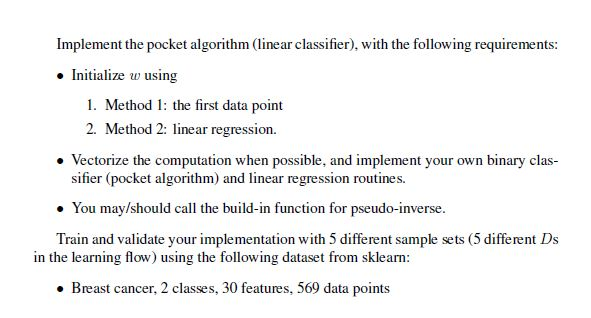 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class Perceptron:
  def __init__(self, X, label, epoches, error=0.01):
    # add the 1 to the first column in X, corresponding to w0, bias b
    self.X = np.concatenate((np.ones((X.shape[0], 1)), X), 1)
    self.n_rows = self.X.shape[0]
    self.n_columns = self.X.shape[1]
    self.y = label
    # self.W = self.X[0].copy()
    self.max_eps = epoches
    self.error = error

  def W_init(w_i):
    # This function is used to initialize weight w
    # parameter w_i is a char: i - input; r - randomly; z - zeros
    # no return, assign corresponding weight matrix
    if w_i == 'i':
      self.W = self.X[0].copy()
    elif w_i == 'r':
      self.W = np.random.random((self.n_rows,))
    elif w_i == 'z':
      self.W = np.zeros((self.n_rows,))
    else:
      print('The allowed input is: i - first input, r - randomly, z - zeros!')


  def predict(self, i):
    return np.sign(np.dot(self.X[i], self.W.T))

  def evaluate(self):
    y_prv = np.sign(np.dot(self.X, self.W.T)) - self.y
    return sum(np.abs(y_prv))

  def train(self):
    for _ in range(self.max_eps):
      n_miss = 0
      if _%5000 == 0:
        print("n_iter:", _, "miss_rate:", self.evaluate()/self.n_rows, sep='\t')
      for i in range(self.n_rows):
        prv = self.predict(i)
        if prv != self.y[i]:
          n_miss += 1
          self.W = self.W + self.y[i]*self.X[i]
      # print(n_miss)
      if n_miss == 0:
        return self.w
    return self.W


class pocket(Perceptron):
  def __init__(self, X, label, epoches, error=0.01):
    super(pocket, self).__init__(X, label, epoches, error=0.01) 
    self.best_W = self.W
    self.best_miss_rate = 1

  def evaluate(self):
    y_prv = np.sign(np.dot(self.X, self.W.T)) - self.y
    return sum(np.abs(y_prv))

  def train(self):
    n_iter = 0
    while(n_iter <= self.max_eps and self.best_miss_rate >= self.error):
      n_iter += 1
      if n_iter%5000 == 0:
        print("n_iter:", n_iter, "best_miss:", self.best_miss_rate, sep='\t')
        # print(self.best_W[:5])
      for i in range(self.n_rows):
        if self.predict(i) != self.y[i]:
          # print('W_n:', self.W[:5], sep='\t')
          # print(self.y[i], self.X[i][:5], sep='\t')
          self.W += 0.01*self.y[i]*self.X[i]
          # print('W_n+1:', self.W[:5], sep='\t')
          n_miss = self.evaluate()
          # print('best_rate:', self.best_miss_rate, 'new_rate:', n_miss/self.n_rows, sep='\t')
          if n_miss/self.n_rows < self.best_miss_rate:
            self.best_miss_rate = n_miss/self.n_rows
            self.best_W = self.W.copy()
            print('best_miss:', self.best_miss_rate, 'best_W:', self.best_W[:3], sep='\t')
            print('...................................')
    # print("n_iter:", n_iter, "n_miss:", n_miss, sep='\t')
    return self.best_W


In [ ]:
import sklearn.datasets as ds 
bc = ds.load_breast_cancer()
X_bc = bc.data
y_bc = bc.target
y_bc[y_bc==0] = -1                # convert 0 to -1 in target

In [ ]:
pcptn = Perceptron(X_bc, y_bc, 100000)
pcptn.train()
pcptn.W

n_iter:	0	miss_rate:	0.7451669595782073
n_iter:	5000	miss_rate:	0.20035149384885764
n_iter:	10000	miss_rate:	0.20035149384885764
n_iter:	15000	miss_rate:	0.1616871704745167
n_iter:	20000	miss_rate:	0.16520210896309315
n_iter:	25000	miss_rate:	0.15817223198594024
n_iter:	30000	miss_rate:	0.20035149384885764
n_iter:	35000	miss_rate:	0.15817223198594024
n_iter:	40000	miss_rate:	0.140597539543058
n_iter:	45000	miss_rate:	0.1546572934973638
n_iter:	50000	miss_rate:	0.1265377855887522
n_iter:	55000	miss_rate:	0.1757469244288225
n_iter:	60000	miss_rate:	0.15114235500878734
n_iter:	65000	miss_rate:	0.15114235500878734
n_iter:	70000	miss_rate:	0.15114235500878734
n_iter:	75000	miss_rate:	0.140597539543058
n_iter:	80000	miss_rate:	0.14411247803163443
n_iter:	85000	miss_rate:	0.11599297012302284
n_iter:	90000	miss_rate:	0.1195079086115993
n_iter:	95000	miss_rate:	0.15114235500878734


array([  64228.        ,  517399.71400446,   -4137.97000006,
         26178.1399992 ,   -1725.20000007,  -29073.95316021,
        -99713.71673925, -144392.20662683,  -65302.18572022,
        -45923.34290008,  -10126.38188992,   -6278.82990001,
        105767.62230035,  -33468.9579997 ,  -17646.58699956,
         -3028.72166695,  -13040.61350131,  -24134.97179762,
         -7358.92724205,  -11682.30862107,    -913.6620886 ,
        456008.57100415,  -70767.78999886,  -62527.39999929,
         -7540.09999999,  -48923.16819066, -261367.24878661,
       -344221.9145439 , -109881.1204097 , -121729.87189968,
        -29404.42262969])

In [ ]:
pkt = pocket(X_bc, y_bc, 100000, 0.01)
pkt.train()

In [ ]:
W = np.random.randint(0, 100, 30)*0.01
np.dot(W.T, X_bc[0])

1096.36451335

In [ ]:
pkt.X.shape

(569, 31)

In [ ]:
label

array([0.8, 0.8, 0.8, 0.6, 0. , 0.3, 0.1, 0.8, 0.4, 0.9])

In [ ]:
y_bc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
y_bc[y_bc==0] = -1

In [1]:
import numpy as np
np.random.random((5,3))

array([[0.28553114, 0.8955663 , 0.2648969 ],
       [0.21019381, 0.68839185, 0.13935337],
       [0.78419744, 0.3771281 , 0.9373235 ],
       [0.3626345 , 0.51665406, 0.67810336],
       [0.96429246, 0.08929083, 0.04210962]])